<div style="display: flex; background-color:rgb(214, 234, 248 );" >
<h1 style="text-align: center;margin: auto; padding: 40px; ">Détectez des faux billets avec R ou Python </h1>
    <p >   
      
</p>
      
  
</div>

<div>
    <img style="float: right;margin:100px 5px 5px 15px" width="200px"  src="logo.png"  />
</div>
<div style="display: flex; background-color:rgb(213, 219, 219);" >
<div>    

    
* Je suis consultant Data Analyst dans une entreprise spécialisée dans la data. Mon entreprise a décroché une prestation en régie au sein de l’Organisation nationale de lutte contre le faux-monnayage (ONCFM).


* Cette institution a pour objectif de mettre en place des méthodes d’identification des contrefaçons des billets en euros. Ils me demandent de mettre en place une modélisation qui serait capable d’identifier automatiquement les vrais et faux billets à partir de certaines dimensions du billet.
* Une fois la mission terminée et pendant la présentation des résultats, la responsable du projet d’analyse de données à l’ONCFM, Marie, souhaite voir quels sont les traitements et analyses que j'ai réalisé en amont, les différentes pistes explorées pour la construction de l’algorithme, ainsi que le modèle final retenu.
* Pour la partie analyse, je suis demandé de
    
    * Réaliser une régression logistique
    * Opérer des classifications automatiques pour partitionner les données
    * Réaliser une analyse prédictive
    * Réaliser une régression linéaire
</div>

</div>


<a name="top"></a>

# Sommaire :

**Partie 1**
 - <a href="#C1"> 1.1 Importation des libraries</a>

 - <a href="#C2"> 1.2 Importation des données</a>
 
**Partie 2 : L'analyse exploratoire des données**
 - <a href="#C3"> 2.1 L'analyse exploratoire des données</a>
 
**Partie 3 : Imputation des données manquantes**
 - <a href="#C4">Imputation des données manquantes</a>
 - <a href="#C5"> 3.1 Régression Linear Avec Scikit-Learn</a>
 - <a href="#C6"> 3.2 Feature Selection Avec StatsModels</a> 
 
**Partie 4 : Les Analyses Statistiques des Résidus**
 - <a href="#C7"> 4.1 Les Analyses Statistiques des Résidus </a>

**Partie 5 : Les Classifications**
 - <a href="#C8"> Les Classifications</a>  
 - <a href="#C9"> 5.1 Régression Logistique</a> 
 - <a href="#C10"> 5.2 KNeighborsClassifier</a>
 - <a href="#C11"> 5.3 KMeans</a>
 - <a href="#C14"> 5.4 Comparaison des Models </a>
 - <a href="#C15"> 5.5 Conclusion </a>
 
**Partie 6 : Application Final**
 - <a href="#C12">Application Final</a>
 - <a href="#C13">Sources</a>

# <a name="C1"> 1.1 Importation des libraries</a>

In [1]:
# importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# librairies statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Sklearn regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
# Sklearn regression model evaluation functions
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.cluster import KMeans
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import decomposition
from sklearn import preprocessing

import pickle
import warnings
warnings.filterwarnings("ignore")

# <a name="C2"> 1.2 Importation des données</a>

In [2]:
# Importation des données
billets = pd.read_csv('billets.csv', sep=";")

In [3]:
billets.shape

(1500, 7)

In [4]:
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [5]:
# On recupère les informations statistiques sur le fichier billets
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [6]:
# On display les types des colonnes 
billets.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [7]:
# On vérifie s'il y a des valeurs manquantes dans le fichier billets
billets.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [8]:
round(37/1500,2)

0.02

In [9]:
# il y a 37 valeurs manquantes pour la colonne margin_low sois 0.02 % de valeurs totales

In [10]:
# On vérifie s'il y a des doublons
billets.duplicated().sum()

0

In [11]:
# Il n'y a pas des doublons

In [12]:
billets['is_genuine'].unique()

array([ True, False])

# <a name="C3"> 2.1 L'analyse exploratoire des données</a>

<a href="#top">sommaire</a>

In [13]:
billets["is_genuine"].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

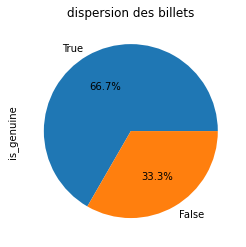

In [14]:
billets["is_genuine"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title("dispersion des billets");


In [15]:
# On a suffisament données pour faire la prédiction des billets vraies et faux
# Nos données ne sont pas équilibreés mais la part des faux billets est assez important
# Alors on continue nos analyses avec ces données.
# Si la part des faux billets était faible on aurai du faire des démarches pour équilibrer des données.

In [16]:
# On récupère des informations statistiques

In [17]:
# Pour df total
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [18]:
# pour des vrais billets
billets_vrais=billets[billets["is_genuine"]==True]
billets_vrais.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1000.000000,1000.000000,1000.00000,971.000000,1000.00000,1000.000000
mean,171.987080,103.949130,103.80865,4.116097,3.05213,113.202430
std,0.300441,0.300231,0.29157,0.319124,0.18634,0.359552
min,171.040000,103.140000,102.82000,2.980000,2.27000,111.760000
25%,171.790000,103.740000,103.61000,3.905000,2.93000,112.950000
50%,171.990000,103.950000,103.81000,4.110000,3.05000,113.205000
75%,172.200000,104.140000,104.00000,4.340000,3.18000,113.460000
max,172.920000,104.860000,104.95000,5.040000,3.74000,114.440000


In [19]:
# pour des faux billets
billets_faux=billets[billets["is_genuine"]==False]
billets_faux.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,500.000000,500.000000,500.000000,492.000000,500.000000,500.000000
mean,171.901160,104.190340,104.143620,5.215935,3.350160,111.630640
std,0.306861,0.223758,0.270878,0.553531,0.180498,0.615543
min,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000
25%,171.690000,104.040000,103.950000,4.840000,3.220000,111.200000
50%,171.910000,104.180000,104.160000,5.190000,3.350000,111.630000
75%,172.092500,104.332500,104.320000,5.592500,3.472500,112.030000
max,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000


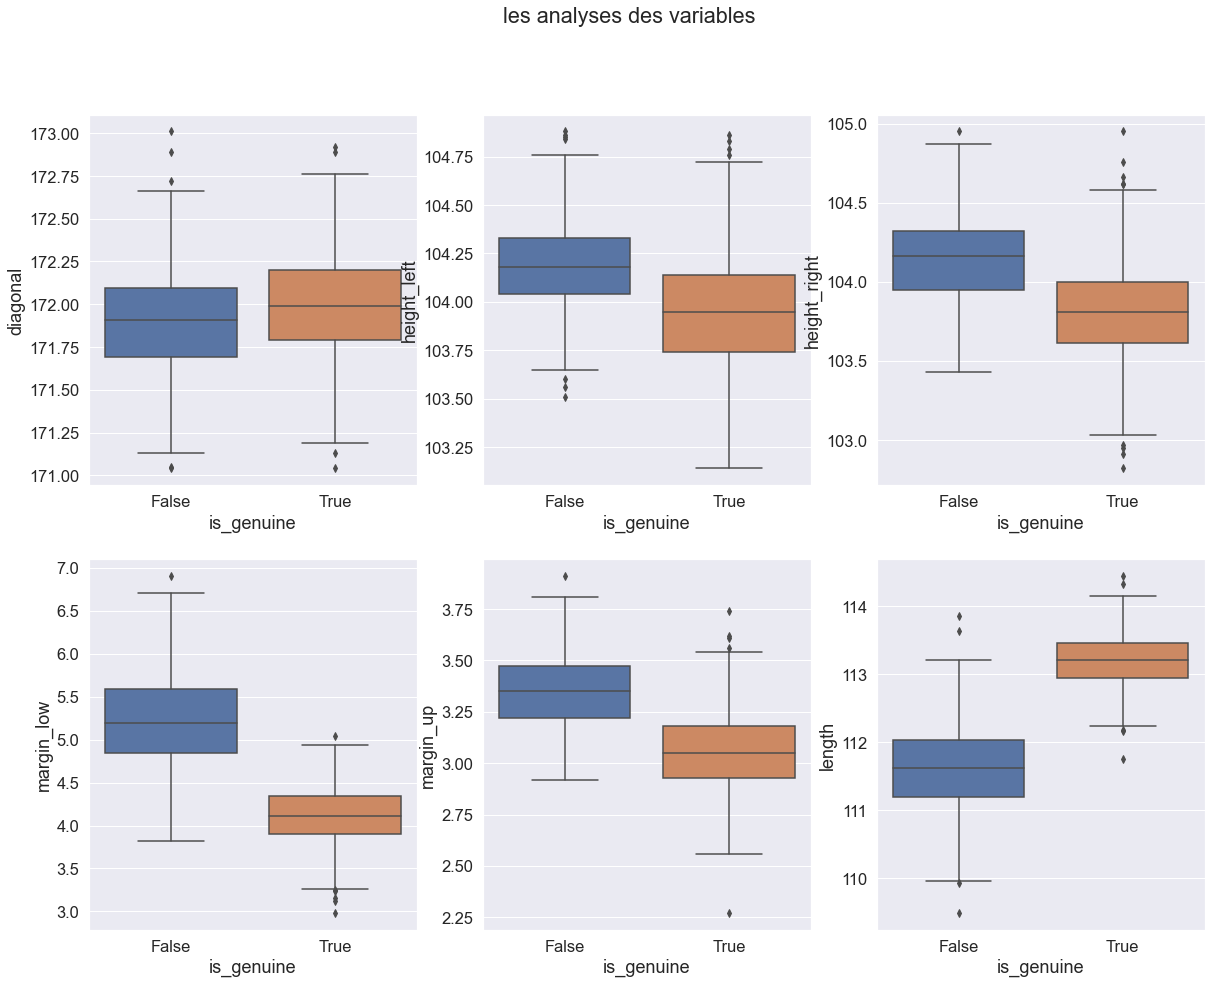

In [20]:
# On fait des boxplots pour voir des caractéristiques des variables
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
data=billets
x='is_genuine'
fig.suptitle('les analyses des variables')
sns.boxplot(ax=axes[0, 0], data=data, x=x, y="diagonal")
sns.boxplot(ax=axes[0, 1], data=data, x=x, y="height_left")
sns.boxplot(ax=axes[0, 2], data=data, x=x, y='height_right')
sns.boxplot(ax=axes[1, 0], data=data, x=x, y='margin_low')
sns.boxplot(ax=axes[1, 1], data=data, x=x, y='margin_up')
sns.boxplot(ax=axes[1, 2], data=data, x=x, y='length');


D'après les graphiques on peut dire que pour distinguer les billets vraies ou faux présque tous les variables sont significatives notamment **margin_low** et **length**

In [21]:
# Il y a certains outliers mais ils ne sont pas très importants alors on laisse ces valeurs atypiques 

In [22]:
data=billets.drop("is_genuine",axis=1)
data.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


In [23]:
X=data.values

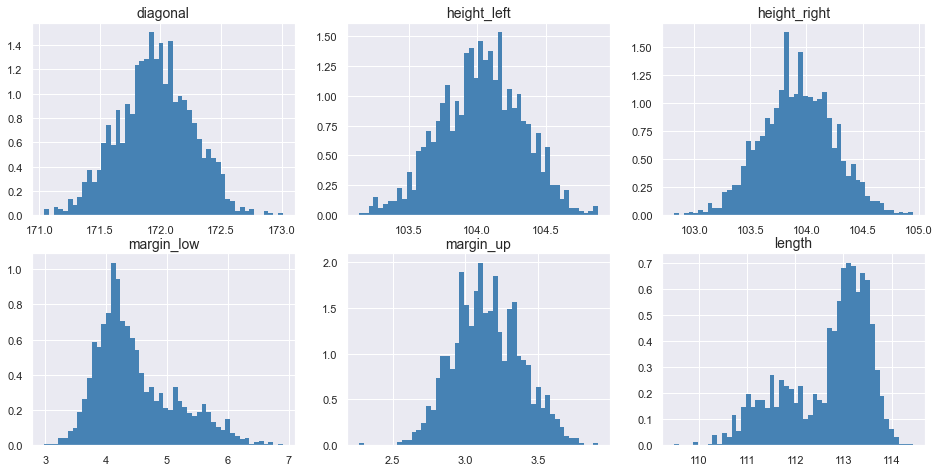

In [24]:
sns.set()
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,3, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)


In [25]:
# On vois que les distributions des features sont plutôt normal

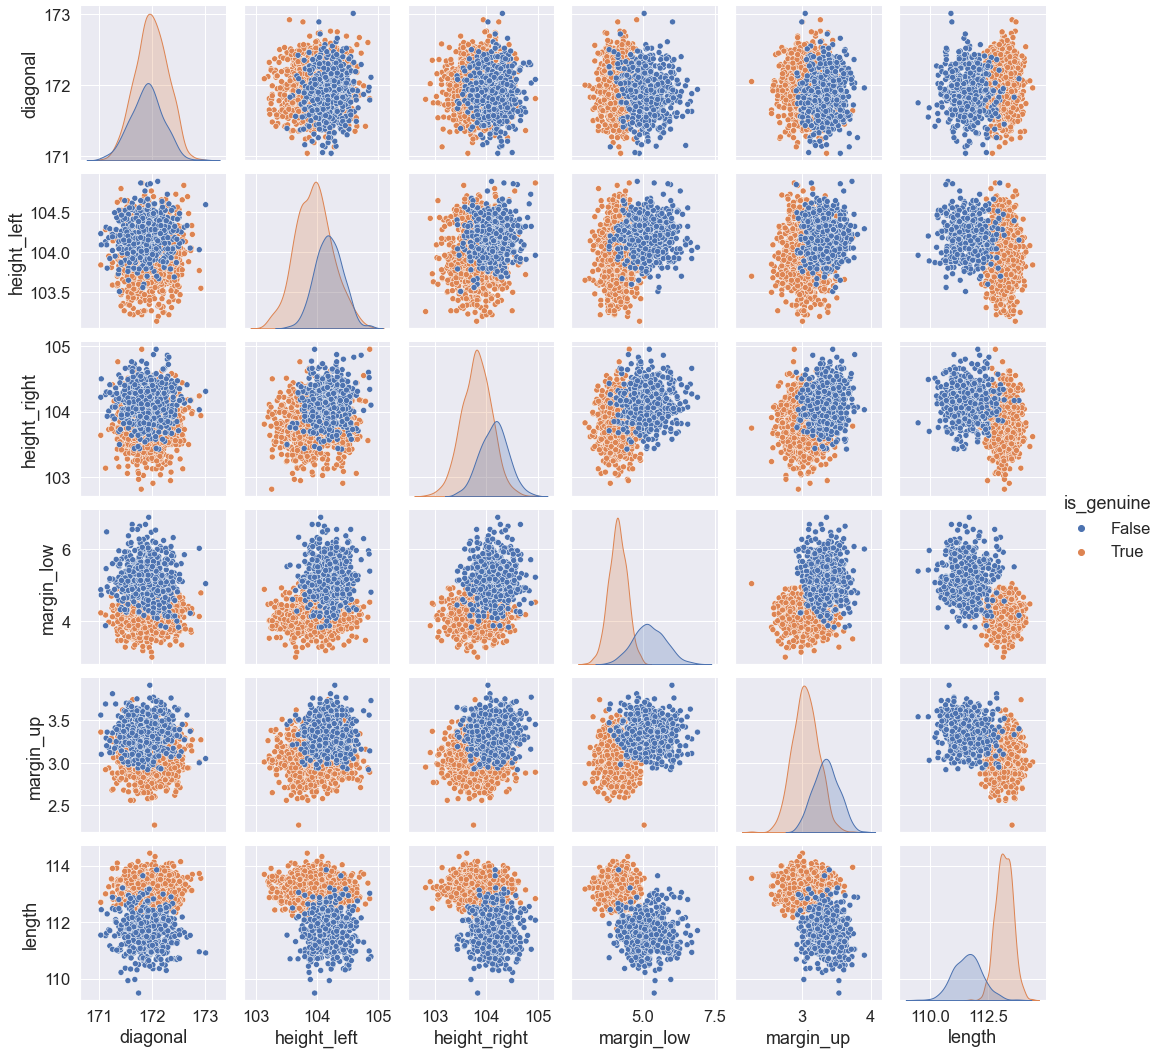

In [26]:
# On fait les graphiques entres les variables
sns.set()
sns.set(font_scale=1.5)
sns.pairplot(billets,hue="is_genuine");

On voit que les vraies et les faux billets sont bien distingués entre margin_low et length

## On regarde les corrélations entres les variables ensemble vrais et faux

In [27]:
billets.drop("is_genuine",axis=1).corr()

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


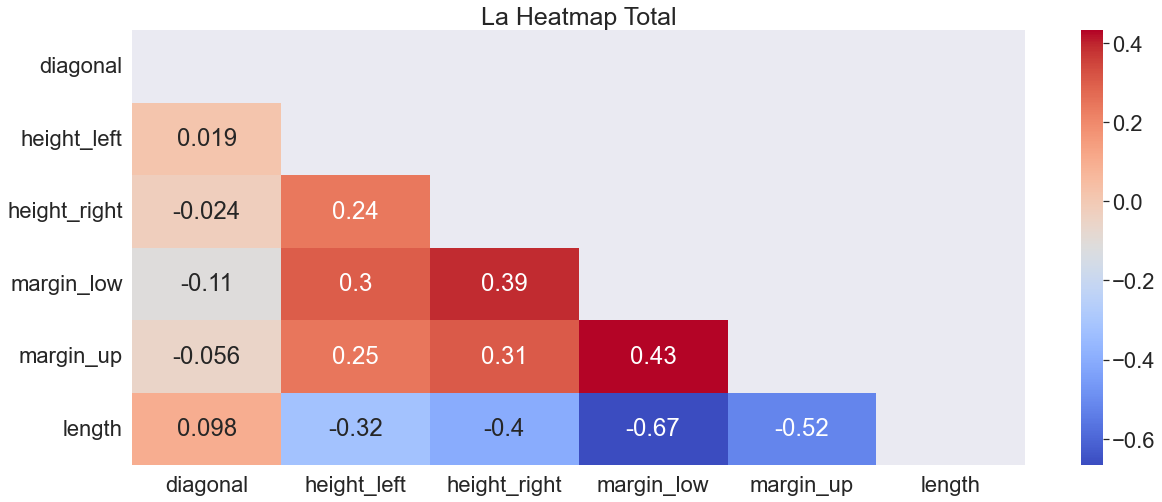

In [28]:
fig=plt.figure(figsize=(20,8))
sns.set(font_scale=2)
matrix=billets.drop("is_genuine",axis=1).corr()
plt.title("La Heatmap Total",size=25)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot = True,cmap="coolwarm",mask=mask);

**Les variables les plus corrélées sont** 
 
    margin_low et length avec 67%

    margin_low et margin_up avec 43%

    margin_up et length avec 52%

**Comme il n'y a pas une forte corrélation entre les variables on laisse comme telle.**


# <a name="C4">Imputation des données manquantes</a>
<a href="#top">sommaire</a>

# La régression linéaire multiple

In [29]:
# Comme on ne sait pas les informations sur les billets données s'ils sont vrais ou pas dans la vraie vie 
# on supprime la colonne "is_genuine"

In [30]:
data=billets.drop("is_genuine",axis=1)

In [31]:
data.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


In [32]:
# On defini un dataframe sans les nulls
billets_without_nan = data.dropna()

In [33]:
# On defini un dataframe avec les valeurs manquantes
billets_nan = data[data.margin_low.isnull()]

In [34]:
billets_nan.shape

(37, 6)

# <a name="C5"> 3.1 Régression Linear Avec Scikit-Learn</a>
<a href="#top">sommaire</a>

In [35]:
billets_without_nan.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


In [36]:
# On définie les valeurs explicatives et la valeur à expliquer
# X= les valeurs explicatives
# y= la valeur à expliquer

In [37]:
X=billets_without_nan.drop("margin_low",axis=1)        
y=billets_without_nan["margin_low"]

In [38]:
X.head()

,diagonal,height_left,height_right,margin_up,length
0,171.81,104.86,104.95,2.89,112.83
1,171.46,103.36,103.66,2.99,113.09
2,172.69,104.48,103.50,2.94,113.16
3,171.36,103.91,103.94,3.01,113.51
4,171.73,104.28,103.46,3.48,112.54


In [39]:
y.head()

0    4.52
1    3.77
2    4.40
3    3.62
4    4.04
Name: margin_low, dtype: float64

## Les analyses avec des train et test set

### Séparation jeu de données d'entraînement / jeu de données test

In [40]:
# On divise le dataframe pour le train et test set avec 80% de train et 20% de test
# séparation jeu de données d'entraînement / jeu de données test

In [41]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8,random_state=3)

In [42]:
print(xtrain.shape)
print(xtest.shape)

(1170, 5)
(293, 5)


In [43]:
xtrain.head()

,diagonal,height_left,height_right,margin_up,length
336,171.80,103.96,103.87,2.65,112.68
1102,172.31,104.11,103.74,3.60,111.78
128,171.96,104.34,103.85,3.28,113.73
1154,172.32,103.95,103.94,3.31,111.41
319,172.05,104.11,104.14,2.73,113.30


In [44]:
ytrain.head()

336     3.97
1102    4.96
128     3.95
1154    4.23
319     4.73
Name: margin_low, dtype: float64

# <a name="C6"> 3.2 Feature Selection Avec StatsModels</a>
<a href="#top">sommaire</a>

In [45]:
dftrain=xtrain.copy()
dftrain["margin_low"]=ytrain
dftrain.head()

,diagonal,height_left,height_right,margin_up,length,margin_low
336,171.80,103.96,103.87,2.65,112.68,3.97
1102,172.31,104.11,103.74,3.60,111.78,4.96
128,171.96,104.34,103.85,3.28,113.73,3.95
1154,172.32,103.95,103.94,3.31,111.41,4.23
319,172.05,104.11,104.14,2.73,113.30,4.73


In [46]:
dftest=xtest.copy()
dftest["margin_low"]=ytest
dftest.head()

,diagonal,height_left,height_right,margin_up,length,margin_low
142,172.18,104.46,103.80,2.84,113.58,4.31
1498,172.06,104.28,104.06,3.46,112.25,5.17
254,172.17,104.21,103.87,2.98,113.66,4.35
1146,171.94,104.53,103.81,3.14,112.46,5.07
1084,171.94,104.27,103.94,3.14,112.13,4.46


# Avec train set

In [47]:
reg_multi_train_stats = smf.ols('margin_low ~ length+diagonal+height_left+height_right+margin_up', data=dftrain).fit()
print(reg_multi_train_stats.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     218.8
Date:                Fri, 04 Nov 2022   Prob (F-statistic):          1.22e-164
Time:                        13:34:29   Log-Likelihood:                -820.04
No. Observations:                1170   AIC:                             1652.
Df Residuals:                    1164   BIC:                             1682.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       21.1659     11.001      1.924   

In [48]:
# On voit que sauf intercept tous les p valeurs sont inférieur à 0.05 
# Alors tous les features sont significatives pour nos analyses

### Création de model LinearRegression, training et prédiction

In [49]:
model = LinearRegression()
model.fit(xtrain,  ytrain)

LinearRegression()

### Evaluation metrics sur training set

In [50]:
predictions = model.predict(xtrain)

In [51]:
print(model,"de train set")
print("    MAE de train set",round(mean_absolute_error(ytrain, predictions),2))
print("    RMSE de train set",round(sqrt(mean_squared_error(ytrain, predictions)),2))
print("    MAPE de train set" ,round(mean_absolute_percentage_error(ytrain, predictions),2))
print("    R2 de train set", round(r2_score(ytrain, predictions),2))

LinearRegression() de train set
    MAE de train set 0.38
    RMSE de train set 0.49
    MAPE de train set 0.08
    R2 de train set 0.48


In [52]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [53]:
print(round(MAPE(ytrain,predictions),2))

8.4


### Evaluation metrics sur test set

In [54]:
predictions = model.predict(xtest)

In [55]:
print(model,"de test set")
print("    MAE de test set",round(mean_absolute_error(ytest, predictions),2))
print("    RMSE de test set",round(sqrt(mean_squared_error(ytest, predictions)),2))
print("    MAPE de test set",round(mean_absolute_percentage_error(ytest, predictions),2))
print("    R2 de test set",round(r2_score(ytest, predictions),2))

LinearRegression() de test set
    MAE de test set 0.34
    RMSE de test set 0.45
    MAPE de test set 0.08
    R2 de test set 0.43


In [56]:
print(round(MAPE(ytest,predictions),2))

7.8


## Cross Validation

In [57]:
from sklearn.model_selection import KFold
# Create 5 folds
seed = 3
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Create a model 
model = LinearRegression()

# Train and evaluate multiple models using kfolds
results = cross_val_score(model, X, y, cv=kfold, scoring='r2')
print(np.round(results,3))
print("Mean:", round(results.mean(),3))
print("Std:", round(results.std(),3))


[0.427 0.495 0.503 0.483 0.419]
Mean: 0.465
Std: 0.035


In [58]:
# Après tous nos analyses on peut dire que notre modèle est robuste
# Et il n'y a pas un problème de overfitting ou underfitting.

## Comparaison avec des autres models

In [59]:
# Pour train set

In [60]:
# Création des models et évaluation avec MAE, RMSE and R2
models = [LinearRegression(), KNeighborsRegressor(),Ridge()]
for model in models:
    model.fit(xtrain, ytrain)
    predictions = model.predict(xtrain)
    print(model)
    print("    MAE", round(mean_absolute_error(ytrain, predictions),2))
    print("    RMSE", round(sqrt(mean_squared_error(ytrain, predictions)),2))
    print("    R2", round(r2_score(ytrain, predictions),2))

LinearRegression()
    MAE 0.38
    RMSE 0.49
    R2 0.48
KNeighborsRegressor()
    MAE 0.31
    RMSE 0.41
    R2 0.63
Ridge()
    MAE 0.38
    RMSE 0.49
    R2 0.48


In [61]:
# Pour test set

In [62]:
# Création des models et évaluation avec MAE, RMSE and R2
models = [LinearRegression(), KNeighborsRegressor(),Ridge()]
for model in models:
    model.fit(xtrain, ytrain)
    predictions = model.predict(xtest)
    print(model)
    print("    MAE", round(mean_absolute_error(ytest, predictions),2))
    print("    RMSE", round(sqrt(mean_squared_error(ytest, predictions)),2))
    print("    R2", round(r2_score(ytest, predictions),2))

LinearRegression()
    MAE 0.34
    RMSE 0.45
    R2 0.43
KNeighborsRegressor()
    MAE 0.35
    RMSE 0.46
    R2 0.38
Ridge()
    MAE 0.34
    RMSE 0.45
    R2 0.43


In [63]:
# On a les meilleur résultats avec LinearRegression et on va imputer les valeurs manquantes avec ce modèle.

### Prédiction les valeurs nulls pour le df billets_nan

In [64]:
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions_nan = model.predict(billets_nan.drop("margin_low",axis=1))
predictions_nan

array([4.32303961, 4.3974008 , 4.41187937, 4.32145032, 4.65589283,
       3.79347521, 4.18105811, 4.12335307, 4.13986588, 4.16348522,
       4.18490598, 3.75492999, 4.05667342, 4.30015466, 4.15509179,
       4.08306889, 4.44414275, 4.47454656, 4.34820904, 4.08437712,
       3.60664295, 4.37052695, 4.09272026, 4.24665578, 3.88636492,
       3.73389454, 4.23823959, 4.71475711, 4.13935459, 5.06064481,
       4.80872679, 5.07551533, 5.06268375, 4.79256456, 5.7539506 ,
       5.21233482, 5.15518675])

# <a name="C7"> 4.1 Les Analyses Statistiques des Résidus </a>
<a href="#top">sommaire</a>

In [65]:
# On a utilisé les codes fournis dans les cours

- On réalise les tests à un niveau $\alpha=5$% 
- $n$, le nombre d'individus de l'échantillon, et $p$, le nombre de variables.
- On fait des analyses sur les valeurs atypiques et/ou influentes.

In [66]:
alpha = 0.05
n = dftrain.shape[0]
p = 6

In [67]:
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
#analyses['obs'].astype('float')

## Calcule des leviers

In [68]:
analyses['levier'] = reg_multi_train_stats.get_influence().hat_matrix_diag
seuil_levier = 2*p/n

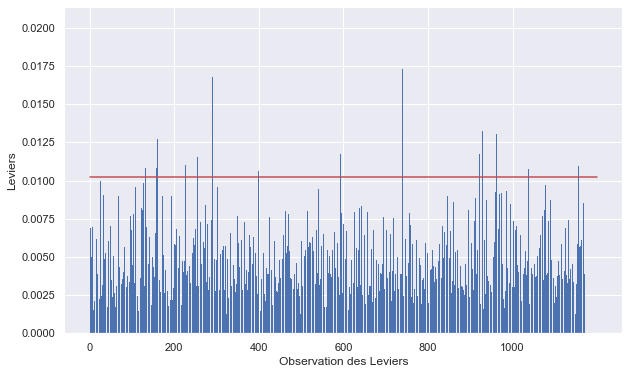

In [69]:
sns.set()
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['levier'],lw=0)
plt.xticks(np.arange(0, 1200, step=200))
plt.xlabel('Observation des Leviers')
plt.ylabel('Leviers')
plt.plot([0, 1200], [seuil_levier, seuil_levier], color='r')
plt.show()

In [70]:
analyses.loc[analyses['levier'] > seuil_levier, :]

,obs,levier
13,14,0.011210
49,50,0.016406
59,60,0.011403
80,81,0.015987
104,105,0.010550
...,...,...
1064,1065,0.017173
1102,1103,0.010677
1145,1146,0.014695
1155,1156,0.010962


## Calcule des résidus studentisés

In [71]:
# le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté 
analyses['rstudent'] = reg_multi_train_stats.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

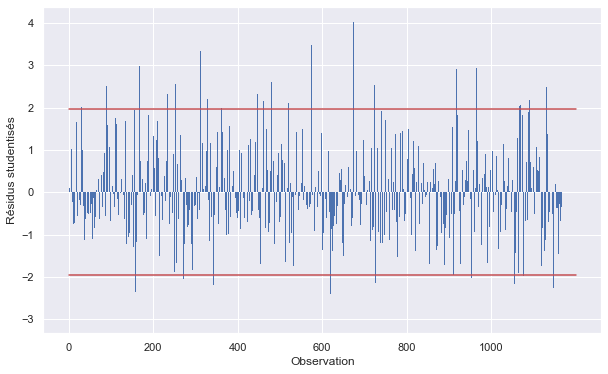

In [72]:
sns.set()
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['rstudent'],lw=0)
plt.xticks(np.arange(0, 1200, step=200))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 1200], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1200], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

## Détermination de la distance de Cook

In [73]:
influence = reg_multi_train_stats.get_influence().summary_frame()

In [74]:
# Le seuil de la distance de Cook est de n-p
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

On peut détecter comme ceci :

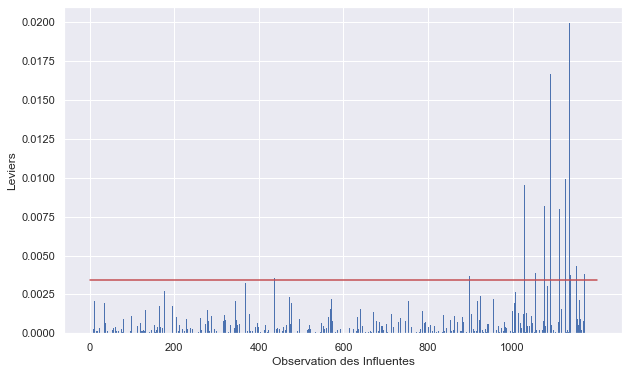

In [75]:
# les observations influentes 
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['dcooks'],lw=0)
plt.xticks(np.arange(0, 1200, step=200))
plt.xlabel('Observation des Influentes')
plt.ylabel('Leviers')
plt.plot([0, 1200], [seuil_dcook, seuil_dcook], color='r')
plt.show()

On ne retire des points qu'après avoir vérifié qu'ils sont effectivement atypiques, voire aberrants, au vu du modèle estimé.

## Vérification de la colinéarité des variables

In [76]:
variables = reg_multi_train_stats.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.6112141563833122,
 1.0164179202581582,
 1.1436319338963596,
 1.2459601965270164,
 1.4225921526535235]

Tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

## Teste l’homoscédasticité 

In [77]:
# L’homoscédasticité (c'est-à-dire la constance de la variance) des résidus

In [78]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi_train_stats.resid, variables)
print('   p value test Breusch Pagan:', pval)

   p value test Breusch Pagan: 4.398162037749624e-12


La p-valeur ici est inférieure à $5$%, on rejette l'hypothèse $H0$ selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).

## Teste la normalité des résidus

In [79]:
# On fait un test de Shapiro-Wilk.
shapiro(reg_multi_train_stats.resid)

ShapiroResult(statistic=0.9872238039970398, pvalue=1.3741762394658963e-08)

Ici, l'hypothèse de normalité est remise en cause (p-value < 0.05).

Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que **les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes**, même si le résidu n'est pas considéré comme étant gaussien.


# Imputation des valeurs manquantes

In [80]:
billets_clean = billets.copy()
s = pd.Series(data = predictions_nan, index = billets_clean[billets_clean["margin_low"].isnull()].index)
billets_clean["margin_low"]=billets_clean["margin_low"].fillna(value = s)

In [81]:
# billets_clean=billets.copy()
# billets_clean["margin_low"][billets_clean["margin_low"].isnull()] = predictions_nan

In [82]:
billets_clean.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [83]:
billets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [84]:
#billets_clean.to_csv("billets_clean.csv",index=False)

# <a name="C8">Les Classifications </a>
<a href="#top">sommaire</a>

In [85]:
# D'abord comme on va prédire les faux billets on va mettre une valeur 1 pour mieux interpréter les résultats
# On va nommer les faux billets comme "1" et les vrais billets "0"

In [86]:
billets_clean["is_genuine"]=billets_clean["is_genuine"].replace([True,False],[0,1])

In [87]:
billets_clean["is_genuine"].value_counts()

0    1000
1     500
Name: is_genuine, dtype: int64

# <a name="C9"> 5.1 Régression Logistique </a>
<a href="#top">sommaire</a>

In [88]:
# On définie les valeurs explicatives et la valeur à expliquer
# X= les valeurs explicatives
# y= la valeur à expliquer

In [89]:
X=billets_clean.drop("is_genuine",axis=1)
y=billets_clean.is_genuine

In [90]:
# split X et y à train et test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [91]:
X_train.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
549,171.89,104.22,104.18,4.11,2.89,113.53
948,171.84,104.39,103.83,3.77,2.97,113.05
1320,172.05,104.60,104.32,5.12,3.35,111.78
975,172.43,104.04,104.26,4.56,3.24,112.82
744,172.10,103.95,103.72,4.49,3.07,113.15


In [92]:
y_train.head()

549     0
948     0
1320    1
975     0
744     0
Name: is_genuine, dtype: int64

In [93]:
df_train = X_train.copy()
df_train["is_genuine"] = y_train
df_train.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
549,171.89,104.22,104.18,4.11,2.89,113.53,0
948,171.84,104.39,103.83,3.77,2.97,113.05,0
1320,172.05,104.60,104.32,5.12,3.35,111.78,1
975,172.43,104.04,104.26,4.56,3.24,112.82,0
744,172.10,103.95,103.72,4.49,3.07,113.15,0


In [94]:
df_train.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
549,171.89,104.22,104.18,4.11,2.89,113.53,0
948,171.84,104.39,103.83,3.77,2.97,113.05,0
1320,172.05,104.60,104.32,5.12,3.35,111.78,1
975,172.43,104.04,104.26,4.56,3.24,112.82,0
744,172.10,103.95,103.72,4.49,3.07,113.15,0


In [95]:
df_test=X_test.copy()
df_test["is_genuine"]=y_test
df_test.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
851,172.16,103.76,103.72,4.180000,3.02,113.43,0
816,171.84,103.62,103.93,4.290000,2.95,113.22,0
919,171.92,103.68,103.45,3.733895,2.58,113.68,0
1042,171.75,103.99,104.21,4.740000,3.40,110.50,1
581,172.51,103.57,104.27,3.720000,3.33,113.47,0


In [96]:
df_train.columns

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length', 'is_genuine'],
      dtype='object')

## Feature Selection

In [97]:
reg_log1 = smf.glm('is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length',
                   data=df_train, family=sm.families.Binomial()).fit()
print(reg_log1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1193
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35.584
Date:                Fri, 04 Nov 2022   Deviance:                       71.168
Time:                        13:34:38   Pearson chi2:                 2.57e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.7033
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -6.8183    286.865     -0.024   

In [98]:
# On constate que certains features ne sont pas significatifs pour nos analyses 
# Parce que les p valeurs sont supérieur à 0.05 pour ces features
# On va les enlever avec la méthode backward

## La Méthode Backward

In [99]:
def backward_selected(data, response):
    """Linear model designed by backward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by backward selection
           evaluated by parameters p-value
    """
    remaining = set(data._get_numeric_data().columns)
    if response in remaining:
        remaining.remove(response)
    cond = True

    while remaining and cond:
        formula = "{} ~ {} + 1".format(response,' + '.join(remaining))
        print('_______________________________')
        print(formula)
        model = smf.glm(formula, data,family=sm.families.Binomial()).fit()
        score = model.pvalues[1:]
        toRemove = score[score == score.max()]
        if toRemove.values > 0.05:
            print('remove', toRemove.index[0], '(p-value :', round(toRemove.values[0],3), ')')
            remaining.remove(toRemove.index[0])
        else:
            cond = False
            print('is the final model !')
        print('')
    print(model.summary())

In [100]:
columns = ['is_genuine','diagonal', 'height_left', 'height_right', 'margin_low','margin_up', 'length']
reg_backward = backward_selected(df_train[columns], 'is_genuine')

_______________________________
is_genuine ~ diagonal + length + margin_low + height_right + height_left + margin_up + 1
remove diagonal (p-value : 0.352 )

_______________________________
is_genuine ~ length + margin_low + height_right + height_left + margin_up + 1
remove height_right (p-value : 0.24 )

_______________________________
is_genuine ~ length + margin_low + height_left + margin_up + 1
is the final model !

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1195
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36.736
Date:                Fri, 04 Nov 2022   Deviance:                       73.472
Time:                   

In [101]:
# On constate que les features qui sont significatives pour nos analyses sont 'height_left','margin_low', 'margin_up', 'length'
# Parce que les p valeurs sont inférieur à 0.05 pour ces features

## Régression Logistique avec Sklearn

In [102]:
billets_clean.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

Selection des Features

In [103]:
feature_cols = ['height_left','margin_low', 'margin_up', 'length']
X_train = df_train[feature_cols] # Features
y_train = df_train.is_genuine # Target variable
X_test = df_test[feature_cols] # Features
y_test = df_test.is_genuine # Target variable

In [104]:
X_test.shape

(300, 4)

Model Development et Prediction

In [105]:
# import the class
from sklearn.linear_model import LogisticRegression
# création de model
logreg = LogisticRegression(random_state=3)
# fit the model avec data
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [106]:
from sklearn.metrics import accuracy_score
print("     LogisticRegression Accuracy Score pour train set", round(accuracy_score(y_train, y_pred_train),2))
print("     LogisticRegression Accuracy Score pour test set", accuracy_score(y_test, y_pred_test))

     LogisticRegression Accuracy Score pour train set 0.99
     LogisticRegression Accuracy Score pour test set 0.99


In [107]:
# Comme nos examples ne sont pas équilibrés on va regarder aussi les autres performance pour le model

Model Evaluation avec Confusion Matrix

In [108]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[201,   0],
       [  3,  96]])

In [109]:
y_test.value_counts()

0    201
1     99
Name: is_genuine, dtype: int64

Dans notre data 1=False billet et 0=True billet

Alors notre model a prédit 96 faux billets corréctement et 3 faux billets étaient faux mais il a consideré comme vrais

Notre model a prédit 201 vrais billets  comme des vrais 

Visualisation Confusion Matrix avec Heatmap


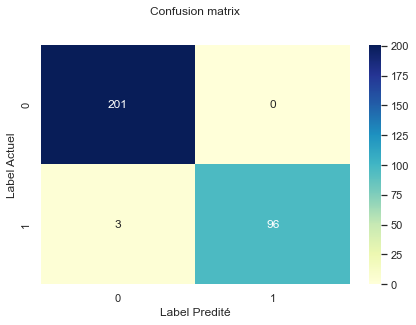

In [110]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# creation heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Label Actuel')
plt.xlabel('Label Predité');


In [111]:
y_test.value_counts()

0    201
1     99
Name: is_genuine, dtype: int64

Confusion Matrix Evaluation Metrics

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       201
           1       1.00      0.97      0.98        99

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



In [113]:
# On peut calculer ces résultats aussi nous mêmes.

In [114]:
TP = 96 # True positive
TN = 201 # True negative
FP = 0 # False positive
FN = 3 # False negative

In [115]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN) # sensitivity
F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy score est " ,precision)
print("precision score est " ,precision)
print("recall score est " ,recall)
print("F1 score est " ,F1)

accuracy score est  1.0
precision score est  1.0
recall score est  0.9696969696969697
F1 score est  0.9846153846153847


In [116]:
# F1 score= 2 * (precision * recall) / (precision + recall)

**Precision** est le taux de vrais positifs sur le total des prédictions positives

**Recall(sensibilité)** est le taux de positif prédit corréctement parmi tous les positifs actuels

ROC Courbe

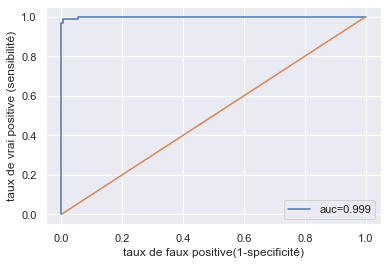

In [117]:
sns.set()
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(round(auc,3)))
plt.plot([0, 1], [0, 1])
plt.legend(loc=4)
plt.xlabel("taux de faux positive(1-specificité)")
plt.ylabel("taux de vrai positive (sensibilité)")
plt.show()

In [118]:
# AUC est l'aire sous la courbe bleue

## Cross Validation

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [120]:
# On divise le train set en 5 partie
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=3)
model = logreg
cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')


array([0.99166667, 0.97916667, 0.99583333, 0.98333333, 1.        ])

In [121]:
# Nos résultats sont proches alors on peut dire que notre model est bon

## Learning Curve

In [122]:
from sklearn.model_selection import learning_curve

[ 96 192 288 384 480 576 672 768 864 960]


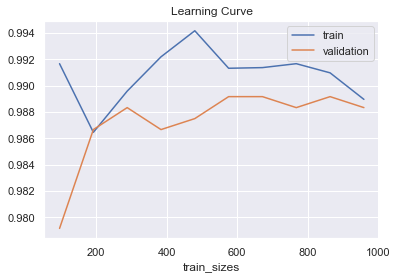

In [123]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.title("Learning Curve")
plt.xlabel('train_sizes')
plt.legend();

## Les probabilités des prédictions

In [124]:
probas = logreg.predict_proba(X_test)
#X_test["Probas_vrais"] = probas[:,0]
#X_test["Probas_faux"] = probas[:,1]
probas[0:5, :]

array([[9.98692542e-01, 1.30745823e-03],
       [9.97024880e-01, 2.97511970e-03],
       [9.99979157e-01, 2.08433259e-05],
       [9.52873736e-05, 9.99904713e-01],
       [9.99535219e-01, 4.64781016e-04]])

In [125]:
# Dans l'array au déssus chaque ligne corréspond à une seule observation.
# La première colonne répresente la probabilité que la sortie prédite soit "0",1-p(x), des vraies billets
# La deuxième colonne répresente la probavilité que la sortie soit "1",p(x), des faux billets

## Predictions des billets production

In [126]:
billets_production=pd.read_csv("billets_production.csv")
billets_production

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [127]:
data_test_lr = billets_production.copy()

In [128]:
y_pred_prod_lr = model.predict(data_test_lr[feature_cols])
y_pred_prod_lr

array([1, 1, 1, 0, 0])

In [129]:
data_test_lr["prediction_lr"] = y_pred_prod_lr
result = []
for i in y_pred_prod_lr :
    if i == 1 : 
        result.append("faux billet")
    else :
        result.append("vrai billet")
data_test_lr["probas_faux"] = logreg.predict_proba(data_test_lr[feature_cols])[:,1]
data_test_lr["result"] = result
data_test_lr

,diagonal,height_left,height_right,margin_low,margin_up,length,id,prediction_lr,probas_faux,result
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,1,0.998758,faux billet
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,1,0.998941,faux billet
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,1,0.998448,faux billet
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0,0.028512,vrai billet
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0,0.000630,vrai billet


# <a name="C10"> 5.2 KNeighborsClassifier </a>
<a href="#top">sommaire</a>

### Au début on donne un nombre de k aléatoire

In [130]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train, y_train)

# On récupère les prédictions sur les données train
predicted_train = model_knn.predict(X_train)
# On récupère les prédictions sur les données test
predicted_test = model_knn.predict(X_test)

# On récupère les scores
print('   train score:',round(model_knn.score(X_train, y_train),3))
print('   test score:',round (model_knn.score(X_test, y_test),3))

   train score: 0.992
   test score: 0.977


In [131]:
print("Knn Accuracy Score", round(accuracy_score(y_test, predicted_test),3))

Knn Accuracy Score 0.977


## Model Evaluation avec Confusion Matrix

In [132]:
# import the metrics class
from sklearn import metrics

cnf_matrix_knn = metrics.confusion_matrix(y_test, predicted_test)
cnf_matrix_knn

array([[200,   1],
       [  6,  93]])

Visualisation Confusion Matrix avec Heatmap


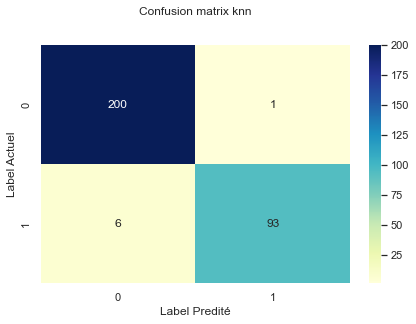

In [133]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# creation heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix knn', y=1.1)
plt.ylabel('Label Actuel')
plt.xlabel('Label Predité');


Confusion Matrix Evaluation Metrics

In [134]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       201
           1       0.99      0.94      0.96        99

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.97       300
weighted avg       0.98      0.98      0.98       300



## Cross Validation

In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [136]:
# On divise le train set en 5 partie
model = KNeighborsClassifier()
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')


array([0.99166667, 0.99583333, 0.99583333, 0.98333333, 0.9875    ])

In [137]:
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=3)
cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

array([0.99166667, 0.98333333, 0.99166667, 0.9875    , 1.        ])

''

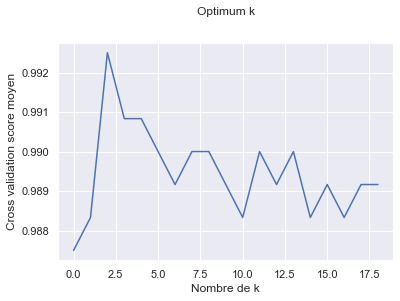

In [138]:
# On essaie de trouver le nombre optimum de k
val_score = []
for k in range(1, 20):
    score = cross_val_score(KNeighborsClassifier(k),
                    X_train, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)
plt.title('Optimum k', y=1.1)
plt.xlabel('Nombre de k')
plt.ylabel('Cross validation score moyen');
;

### On peut choisir k entre 2 et 5 mais pour être sûr on va faire un GridSearch pour trouver les meuilleur parametres

## GridSearchCV

In [139]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(round(grid.best_score_,3))
print(grid.best_params_)

0.993
{'metric': 'manhattan', 'n_neighbors': 3}


Le nombre de k optimum est le 3

In [140]:
# On choisi le best estimator en tant que model 
# On constate une amélioration au niveau de score
model = grid.best_estimator_
round(model.score(X_test, y_test),3)

0.987

In [141]:
predicted_grid = model.predict(X_test)

In [142]:
# import the metrics class
from sklearn import metrics

cnf_matrix_grid = metrics.confusion_matrix(y_test, predicted_grid)
cnf_matrix_grid

array([[200,   1],
       [  3,  96]])

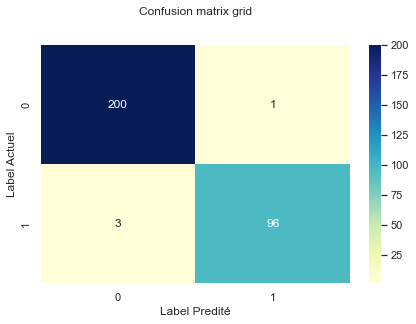

In [143]:
# creation heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_grid), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix grid', y=1.1)
plt.ylabel('Label Actuel')
plt.xlabel('Label Predité');

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_grid))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       201
           1       0.99      0.97      0.98        99

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



## Learning Curve

In [145]:
from sklearn.model_selection import learning_curve

[ 96 192 288 384 480 576 672 768 864 960]


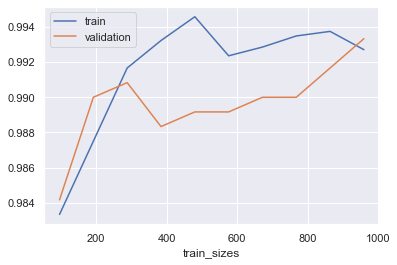

In [146]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend();

## Predictions des billets production

In [147]:
data_test_knn=billets_production.copy()

In [148]:
y_pred_prod_knn = model.predict(data_test_knn[feature_cols])
y_pred_prod_knn

array([1, 1, 1, 0, 0])

In [149]:
data_test_knn["prediction_knn"]=y_pred_prod_knn

result = []
for i in y_pred_prod_knn :
    if i == 1 : 
        result.append("faux billet")
    else :
        result.append("vrai billet")
data_test_knn["probas_faux"] = model.predict_proba(data_test_knn[feature_cols])[:,1]
data_test_knn["result"] = result
data_test_knn

,diagonal,height_left,height_right,margin_low,margin_up,length,id,prediction_knn,probas_faux,result
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,1,1.0,faux billet
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,1,1.0,faux billet
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,1,1.0,faux billet
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0,0.0,vrai billet
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0,0.0,vrai billet


In [150]:
# Nos deux models donnent les mêmes résultats

# <a name="C11"> 5.3 KMeans</a>
<a href="#top">sommaire</a>

In [151]:
X_train.head()

,height_left,margin_low,margin_up,length
549,104.22,4.11,2.89,113.53
948,104.39,3.77,2.97,113.05
1320,104.60,5.12,3.35,111.78
975,104.04,4.56,3.24,112.82
744,103.95,4.49,3.07,113.15


In [152]:
# On fait un graphique des inertias pour trouver le meilleur nombre de cluster
# Normalement on veux faire deux clusters

In [153]:
# On fait la standardisation pour train set
std_scale = preprocessing.StandardScaler().fit(X_train)
X_scaled_tr = std_scale.transform(X_train)

In [154]:
# On fait la standardisation pour test set
std_scale = preprocessing.StandardScaler().fit(X_test)
X_scaled_ts = std_scale.transform(X_test)

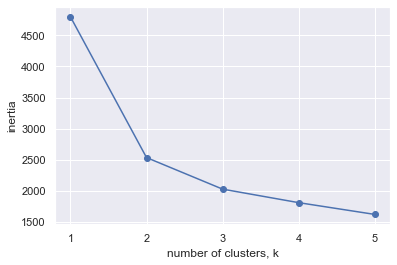

In [155]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
# Fit model to samples
    model.fit(X_scaled_tr)
# Append the inertia to the list of inertias
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [156]:
# La résultat aussi deux clusters

In [157]:
# On fait les prédictions avec kmeans

In [158]:
model = KMeans(n_clusters=2 , random_state = 10)
# On train le model avec train set
model = model.fit(X_scaled_tr)
# On fait la prédiction pour obtenir les labels
labels = model.predict(X_scaled_ts)
# On crée un dataframe avec les labels et y_test
df = pd.DataFrame({'labels':labels, 'y_test': y_test})
# On crée crosstab 
ct = pd.crosstab(df["y_test"],df["labels"])

# Display ct
print(ct)


labels    0   1
y_test         
0       199   2
1         4  95


In [159]:
y_test.value_counts()

0    201
1     99
Name: is_genuine, dtype: int64

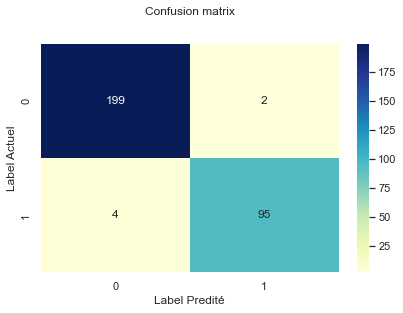

In [160]:
# creation heatmap
sns.heatmap(pd.DataFrame(ct), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Label Actuel')
plt.xlabel('Label Predité');

In [161]:
y_test.value_counts()

0    201
1     99
Name: is_genuine, dtype: int64

In [162]:
print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       201
           1       0.98      0.96      0.97        99

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.98       300
weighted avg       0.98      0.98      0.98       300



In [163]:
# On constate que la pérformance de KMeans est plus faible que les autres models

## Predictions sur des donnees production:

In [164]:
billets_production

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [165]:
data_test_km=billets_production[feature_cols].copy()

In [166]:
# On fait la standardisation pour les données
std_scale_km = preprocessing.StandardScaler().fit(data_test_km)
X_scaled_km = std_scale_km.transform(data_test_km)

In [167]:
y_pred_prod_km = model.predict(X_scaled_km)
y_pred_prod_km

array([1, 1, 1, 0, 0], dtype=int32)

In [168]:
pd.DataFrame(y_pred_prod_km).value_counts()

1    3
0    2
dtype: int64

In [169]:
billets_production_km = billets_production.copy()

In [170]:
billets_production_km["prediction_km"]=y_pred_prod_km
result = []
for i in y_pred_prod_km :
    if i == 1 :
        result.append("Faux billet")
    else :
        result.append("Vrai billet")
billets_production_km["result"] = result
billets_production_km

,diagonal,height_left,height_right,margin_low,margin_up,length,id,prediction_km,result
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,1,Faux billet
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,1,Faux billet
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,1,Faux billet
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0,Vrai billet
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0,Vrai billet


# <a name="C14"> 5.4 Comparaison des Models</a>
<a href="#top">sommaire</a>

In [171]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve ,f1_score

In [172]:
clf = [ LogisticRegression(random_state=3),KNeighborsClassifier(n_neighbors=3,metric = 'manhattan'),
       KMeans(n_clusters=2,random_state=10)] 
clf_columns = [] 
clf_compare = pd.DataFrame(columns = clf_columns)
index = ["LogisticRegression","KNeighborsClassifier","KMeans"]
row_index = 0 
for model in clf: 
    predicted = model.fit(X_train, y_train).predict(X_test) 
    fp, tp, th = roc_curve(y_test, predicted) 
    clf_compare.loc[row_index, 'Train Accuracy'] = round(model.score(X_train, y_train), 3) 
    clf_compare.loc[row_index, 'Test Accuracy'] = round(model.score(X_test, y_test), 3) 
    clf_compare.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted),3) 
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),3) 
    if index[row_index] == "KMeans":
        clf_compare.loc[row_index, 'Train Accuracy'] = None
        clf_compare.loc[row_index, 'Test Accuracy'] = None
    clf_compare.loc[row_index, 'f1_score'] = round(f1_score(y_test, predicted),3)  
    row_index+=1 
    clf_compare.sort_values(by = ['f1_score'], ascending = False, inplace = True) 
clf_compare
clf_compare.set_index([index])

,Train Accuracy,Test Accuracy,Precision,Recall,f1_score
LogisticRegression,0.991,0.990,1.00,0.970,0.985
KNeighborsClassifier,0.993,0.987,0.99,0.970,0.980
KMeans,NaN,NaN,1.00,0.949,0.974


Le model le plus performant est de Le Régression Logistique

# Enregistrement du Model le Plus Performant

In [173]:
filename = 'logreg.sav'
pickle.dump(logreg, open(filename, 'wb'))

# <a name="C15"> Conclusion </a>
<a href="#top">sommaire</a>

* Notre modèle est presque parfait
* Pour une meilleur prédiction  des valeurs manquantes 
     * on peut vérifier les leviers et influentes 
     * et aussi les outliers
* Pour aller plus loin on peut tester avec des autres modèles comme
     * Random Forest ou XGBoost


# <a name="C12">Application Final</a>
<a href="#top">sommaire</a>

In [174]:
# The wb indicates that the file is opened for writing in binary mode.
# 'rb' for reading binary file

In [175]:
# importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
# Sklearn regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# Sklearn regression model evaluation functions
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

def detect_faux (path):
    filename = 'logreg.sav'
    # load the model from disk
    loaded_model = pickle.load(open(filename, 'rb'))
    # on choisi les features
    features=['height_right','margin_low', 'margin_up', 'length']
    data = pd.read_csv(path)
    data_test=data[features]
    # prédiction
    y_pred = loaded_model.predict(data_test)
    
    # affichage les résultats
    #print(y_pred)
    resultat=data.copy()
    resultat["prediction_lr"]=y_pred
    probas = np.round(loaded_model.predict_proba(data_test),3)
    resultat['probas_faux'] = probas[:,1]
    result= []
    for i in y_pred:
        if i == 1 :
            result.append("Faux billet")
        else :
            result.append("Vrai billet")
    resultat["result"]=result
    #print(resultat)
    #print(resultat[["id","prediction_lr","probas_faux","result"]])
    resultat.to_csv('resultat.csv',index=False)
    
    return resultat

In [176]:
path = "/Users/billets_production.csv"
detect_faux (path)

,diagonal,height_left,height_right,margin_low,margin_up,length,id,prediction_lr,probas_faux,result
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,1,0.997,Faux billet
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,1,0.999,Faux billet
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,1,0.998,Faux billet
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0,0.021,Vrai billet
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0,0.001,Vrai billet


# PCA

In [177]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)


In [178]:
billets_clean.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,171.81,104.86,104.95,4.52,2.89,112.83
1,0,171.46,103.36,103.66,3.77,2.99,113.09
2,0,172.69,104.48,103.50,4.40,2.94,113.16
3,0,171.36,103.91,103.94,3.62,3.01,113.51
4,0,171.73,104.28,103.46,4.04,3.48,112.54


In [179]:
data2=billets_clean.drop("is_genuine",axis=1)
Xp = data2.values
names = data2.index
features = data2.columns
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(Xp)
X_scaled_p = std_scale.transform(Xp)

In [180]:
# On voit les sommes cumulative des variances expliquées
from sklearn import decomposition
pca=decomposition.PCA()
pca.fit(X_scaled_p)
print (pca.explained_variance_ratio_.cumsum())
X_trans=pca.transform(X_scaled_p)

[0.43291554 0.60247834 0.73272783 0.85097802 0.94698985 1.        ]


In [181]:
# On constate que on peut expliquer notre data de 85% avec 4 composantes

Populating the interactive namespace from numpy and matplotlib


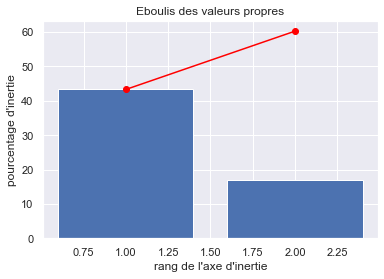

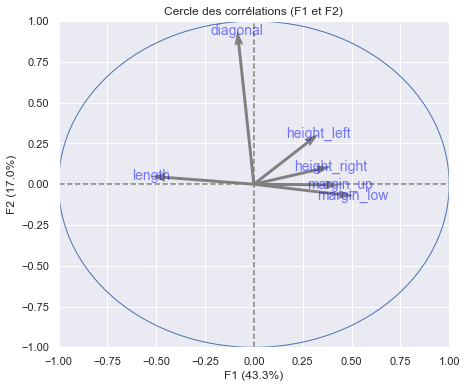

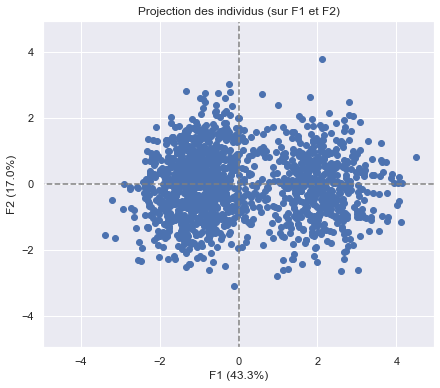

In [182]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing

sns.set(font_scale=1)

# choix du nombre de composantes à calculer
n_comp = 2

# import de l'échantillon
data2 = billets_clean.drop("is_genuine",axis=1)
# préparation des données pour l'ACP

X = Xp
names = names 
features = features

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled_p = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled_p)

# Eboulis des valeurs propres
%pylab inline
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled_p)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var=None) #illustrative_var=np.array(names)
plt.show()

In [183]:
# On vois que même avec deux composantes on peut distinguer les billets.

# <a name="C13">Sources</a>
<a href="#top">sommaire</a>

- https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/4308246-tp-selectionnez-le-nombre-de-voisins-dans-un-knn 

- https://openclassrooms.com/fr/courses/4525326-realisez-des-modelisations-de-donnees-performantes/5754146-tp-pratiquez-la-regression-lineaire-multiple-sur-le-jeu-de-donnees-de-lozone

- https://www.datacamp.com/tutorial/understanding-logistic-regression-python

- https://www.youtube.com/watch?v=w_bLGK4Pteo

- https://medium.com/@data.science.enthusiast/positive-class-in-machine-learning-how-to-define-classes-in-imbalanced-dataset-2940fd243a7e